## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

            sepal length (cm)  ...  petal width (cm)
importance                0.0  ...          0.459743

[1 rows x 4 columns]


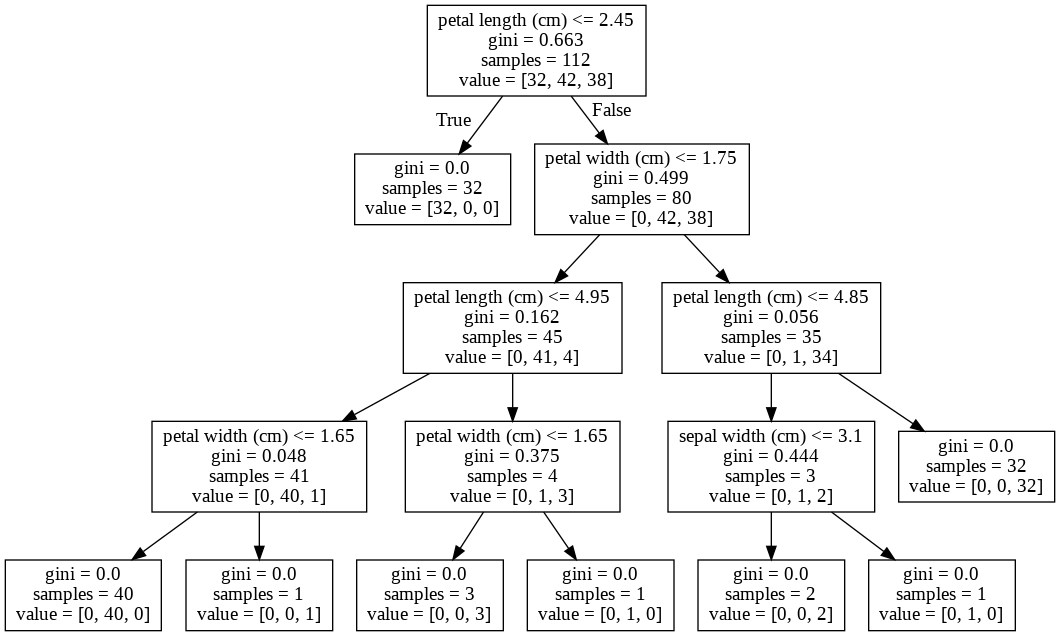

In [1]:
from sklearn import datasets, metrics
import pandas as pd


# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# 讀取鳶尾花資料集
iris = datasets.load_iris()

# print(iris.feature_names)
# df = pd.DataFrame(iris.data,columns=iris.feature_names)
# print(df)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

iris_accuracy = metrics.accuracy_score(y_test, y_pred)
iris_importance = clf.feature_importances_

# print("Acuuracy: ", iris_accuracy)
# print("iris.feature_names: ",iris.feature_names)
# print("Feature importance: ", iris_importance)

iris_df = pd.DataFrame(iris_importance).T
iris_df.columns = iris.feature_names
iris_df.index = ['importance'] 
print(iris_df)


from sklearn import tree
import pydotplus 
from google.colab.patches import cv2_imshow
import cv2


dot_data = tree.export_graphviz(clf, feature_names=iris.feature_names)  
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris.png')    #保存图像

img = cv2.imread('iris.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

             alcohol  malic_acid  ...  od280/od315_of_diluted_wines  proline
importance  0.013641    0.030766  ...                      0.042856  0.38865

[1 rows x 13 columns]


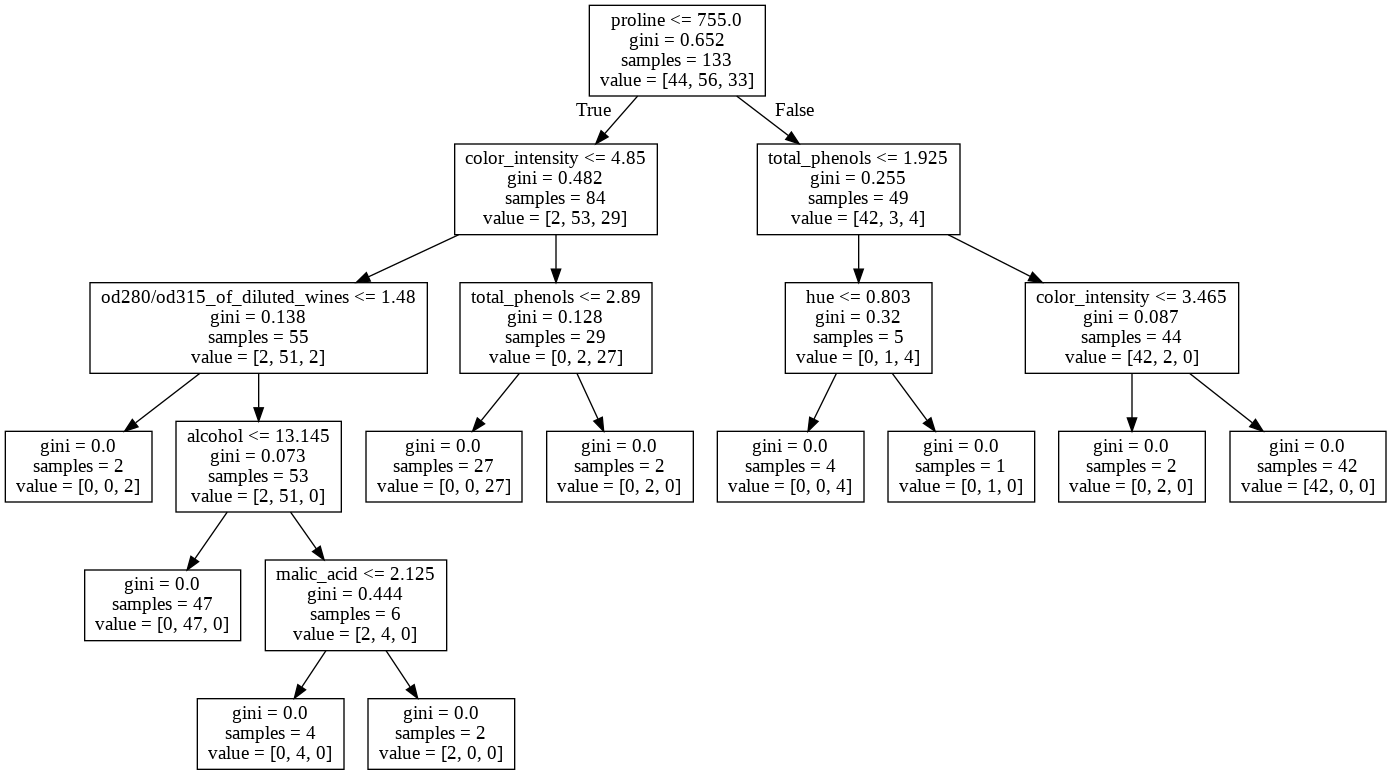

In [2]:
from sklearn import datasets, metrics
import pandas as pd


# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# 讀取葡萄酒資料集
wine = datasets.load_wine()

# print(wine.feature_names)
# df = pd.DataFrame(wine.data,columns=wine.feature_names)
# print(df)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

wine_accuracy = metrics.accuracy_score(y_test, y_pred)
wine_importance = clf.feature_importances_

# print("Acuuracy: ", wine_accuracy)
# print("Feature importance: ", wine_importance)

wine_df = pd.DataFrame(wine_importance).T
wine_df.columns = wine.feature_names
wine_df.index = ['importance'] 
print(wine_df)

from sklearn import tree
import pydotplus 
from google.colab.patches import cv2_imshow
import cv2


dot_data = tree.export_graphviz(clf, feature_names=wine.feature_names)  
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('wine.png')    #保存图像

img = cv2.imread('wine.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
